<div style="text-align: center"><img width=150px src="https://fsharp.org/img/logo/fsharp256.png"></div>

# Introduction to F# #

F# is an open-source and cross-platform language that's supported by the [F# Software Foundation](http://fsharp.org) and a worldwide community of contributors. Microsoft and other companies develop professional tooling for F#.

As a language, F# excels at succinct, correct, and maintainable code, and is scalable from small scripting projects to enterprise-level software. F# is used for [data scripting](https://fsharpforfunandprofit.com/posts/low-risk-ways-to-use-fsharp-at-work-2/), [data science](http://fslab.org), [web programming](http://fsharp.org/guides/web/), and component development. It interoperates with a wide range of software libraries and tools, and you can use all .NET and C# libraries with F#.

F# is well suited for Jupyter notebooks because declarations are ordered in a script-like way. This present notebook, which provides introductory F# example, assumes you are familiar with basic programming structures already. There are also many other [F# learning resources](http://fsharp.org/learn.html), including the[F# Cheatsheet](https://dungpa.github.io/fsharp-cheatsheet/) is a quick guide. 

## F# Basics #

Let's start with some simple arithmetic:

In [1]:
(12/4 + 5 + 7) * 4 - 18

42

The following code creates a list of numbers using `[start .. end]`, and assigns to the variable `sampleNumbers` using the `let` statement:

In [2]:
let sampleNumbers = [ 0 .. 15 ]

sampleNumbers

[0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15]

Next, use `let` to define a function that accepts and returns an integer. When needed, annotate the type of a parameter name using `(argument: type)`. Documentation comments are added using `///`. When calling a function, parenthases are optional:

In [3]:
/// A function to compute a sample curve
let sampleFunction (x:int) = 
    2*x*x - 5*x + 3

sampleFunction 7

66

In [4]:
sampleFunction (7 + 4)

190

Note that F#, like Python, uses indentation to define blocks. You can find out more about this in the topic [F# syntax: indentation and verbosity](https://fsharpforfunandprofit.com/posts/fsharp-syntax/).

To convert between numeric types `int`, `double`, `int64`, `bigint`, and so on, use conversion functions of the same name:

In [5]:
sampleFunction (int 3.14 + int 2.79)

28

Conditionals are expressed using `if...then...else`, and booleans are expressed using `true`, `false`, `&&`, `||` and `not`:

In [6]:
if 98.0 < 100.0 then 10 else 20

10

In [7]:
not false && (true || false)

true

### Strings, Tuples, Lists and Arrays

String literals use quotes or triple-quotes, and you can concatenate strings with the `+` operator:

In [8]:
let helloWorld = "Hello" + " " + "world"

helloWorld

"Hello world"

In [9]:
let tripleQuoteString = """A triple-quoted string can contain double quotes " anywhere within it."""

tripleQuoteString

"A triple-quoted string can contain double quotes " anywhere within it."

A tuple combines multiple data items into one value. Below is a tuple consisting of an integer, a string, and a double-precision floating point number:

In [10]:
(1, "fred", 3.1415)

(1, "fred", 3.1415)

Lists are linear sequences of values of the same type. The code below generates a list containing all the Fridays of the first half of 2017. This example also shows you how to use some of the very extensive .NET libraries, all of which are available to F#. Find out more about the .NET libraries in online resources such as the [.NET Framework API Reference](https://docs.microsoft.com/en-us/dotnet/).

In [11]:
open System

let fridaysList = 
    [ for month in 1 .. 6 do
        for day in 1 .. DateTime.DaysInMonth(2017, month) do 
          let date = DateTime(2017, month, day)
          if date.DayOfWeek = DayOfWeek.Friday then 
            yield date.ToShortDateString() ]
              
fridaysList              

["01/06/2017"; "01/13/2017"; "01/20/2017"; "01/27/2017"; "02/03/2017";
 "02/10/2017"; "02/17/2017"; "02/24/2017"; "03/03/2017"; "03/10/2017";
 "03/17/2017"; "03/24/2017"; "03/31/2017"; "04/07/2017"; "04/14/2017";
 "04/21/2017"; "04/28/2017"; "05/05/2017"; "05/12/2017"; "05/19/2017";
 "05/26/2017"; "06/02/2017"; "06/09/2017"; "06/16/2017"; "06/23/2017";
 "06/30/2017"]

Arrays are similar to lists but are mutable and are stored as flat data rather than linked lists:

In [12]:
let lowNumbers = [| 1 .. 200 |]

lowNumbers

[|1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22;
  23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42;
  43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62;
  63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82;
  83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 100; ...|]

Lists, arrays and sequences can be processed using functions. Use the pipeline operator `|>` and a function to process data using `List.map`:

In [13]:
sampleNumbers 
|> List.map (fun x -> x*x) 

[0; 1; 4; 9; 16; 25; 36; 49; 64; 81; 100; 121; 144; 169; 196; 225]

Pipelines can be chained together.  The following pipeline computes the sum of a selection of square numbers:

In [14]:
let sumOfSelectedSquares = 
    sampleNumbers
    |> List.map (fun x -> x*x) 
    |> List.filter (fun x -> x % 3 = 0)
    |> List.sumBy (fun x -> x * x)
    
sumOfSelectedSquares    

79299

Both lists and arrays can use slicing notation (note that unlike Python, F# slicing notation is inclusive of the upper bound):

In [15]:
lowNumbers.[0 .. 50]

[|1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22;
  23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42;
  43; 44; 45; 46; 47; 48; 49; 50; 51|]

### Sequences

Sequences are computed on-demand and are specified using the same constructs as lists and arrays.  Here is an infinite sequence which is a random walk. Use `yield!` to return each element of a subsequence:

In [16]:
let rnd = System.Random()

let rec randomWalk x =
    seq { yield x
          yield! randomWalk (x + rnd.NextDouble() - 0.5) }

let firstValuesOfRandomWalk = 
    randomWalk 5.0 
    |> Seq.truncate 20
    |> Seq.toList
    
firstValuesOfRandomWalk

[5.0; 4.870012905; 4.718920051; 4.627799181; 4.837676997; 5.105162026;
 5.433771005; 5.039487005; 5.110331846; 5.258812782; 5.132522558; 5.502495585;
 5.037277976; 4.90362592; 4.945485933; 4.507916713; 4.772165732; 4.744528237;
 5.08212232; 5.462497375]

### Type Definitions

F# is a typed language. The example below defines a record type. Learn more about F# type definitions in online resources such as [F# for Fun and Profit](https://fsharpforfunandprofit.com/posts/overview-of-types-in-fsharp/).

The type definition uses an option value. Option values are any kind of value tagged with either `Some` or `None`. They're used extensively in F# code to represent the cases where many other languages would use null references.

In [17]:
type ContactCard = 
    { Name     : string
      Phone    : string
      Verified : bool
      ZipCode : string option}            
      
let sampleCard = { Name = "Alf" ; Phone = "(206) 555-0157" ; Verified = false; ZipCode=Some "90210" }

sampleCard

{Name = "Alf";
 Phone = "(206) 555-0157";
 Verified = false;
 ZipCode = Some "90210";}

In [18]:
let showCard (c: ContactCard) = 
    c.Name + " Phone: " + c.Phone + (if not c.Verified then " (unverified)" else "")
    
showCard sampleCard

"Alf Phone: (206) 555-0157 (unverified)"

### UnitsOfMeasure

Code can be annotated with units of measure when using F# arithmetic over numeric types:

In [19]:
open Microsoft.FSharp.Data.UnitSystems.SI.UnitNames

let raceLength = 1600.0<meter>

[<Measure>]
type mile =
    /// Conversion factor mile to meter: meter is defined in SI.UnitNames
    static member asMeter = 1609.344<meter/mile>

/// Distance expressed using imperial units
let distanceToWalk  = 500.0<mile>          

// Same distanceusing metric system
let distanceToWalkInMeters = distanceToWalk * mile.asMeter   

(raceLength, distanceToWalk, distanceToWalkInMeters)

(1600.0, 500.0, 804672.0)

### Parallel Programming

You can use `Array.Parallel.map` and `Async.Parallel` and related functions to do parallel processing of collections:

In [20]:
let oneBigArray = [| 0 .. 100000 |]

// Do some CPU intensive computation
let rec computeSomeFunction x = 
    if x <= 2 then 1 
    else computeSomeFunction (x - 1) + computeSomeFunction (x - 2)
       
/// Do a parallel map over a large input array
let computeResults() = oneBigArray |> Array.Parallel.map (fun x -> computeSomeFunction (x % 24))

computeResults()

[|1; 1; 1; 2; 3; 5; 8; 13; 21; 34; 55; 89; 144; 233; 377; 610; 987; 1597; 2584;
  4181; 6765; 10946; 17711; 28657; 1; 1; 1; 2; 3; 5; 8; 13; 21; 34; 55; 89; 144;
  233; 377; 610; 987; 1597; 2584; 4181; 6765; 10946; 17711; 28657; 1; 1; 1; 2; 3;
  5; 8; 13; 21; 34; 55; 89; 144; 233; 377; 610; 987; 1597; 2584; 4181; 6765;
  10946; 17711; 28657; 1; 1; 1; 2; 3; 5; 8; 13; 21; 34; 55; 89; 144; 233; 377;
  610; 987; 1597; 2584; 4181; 6765; 10946; 17711; 28657; 1; 1; 1; 2; ...|]

### Learning More

A range of F# learning topics are available online at [The F# Software Foundation](http://fsharp.org/learn) and also the [Microsoft .NET Docs F# Guide](https://docs.microsoft.com/dotnet/fsharp/).

# Special Features of F# in Azure Notebooks

Azure Notebooks uses [`IfSharp`](http://fsprojects.github.io/IfSharp/) to provide F# Notebooks. This section will take you through some of the nice ways you can combine F# features with the display mechanisms provides by `IfSharp`.

## Referencing NuGet Packages using Paket

There are thousands of well-engineered packages available for use with F#.  Most are provided via [nuget.org](http://nuget.org). You can use the [Paket dependency manager](https://fsprojects.github.io/Paket/) to add references to NuGet packages to your F# Azure Notebook.

In [21]:
#load "Paket.fsx"

The following code installs the selected packages; it may take a minute to run on first use with a particular kernel.

In [22]:
Paket.Package
  [ "MathNet.Numerics"
    "MathNet.Numerics.FSharp"
  ]

You can now use these packages from your code using this reference:

In [23]:
#load "Paket.Generated.Refs.fsx"

For example, you can use the MathNet.Numerics linear algebra libraries:

In [24]:
open MathNet.Numerics.LinearAlgebra
let m = matrix [[ 1.0; 2.0 ]
                [ 3.0; 4.0 ]]
m.Inverse() 

DenseMatrix 2x2-Double
 -2     1
1.5  -0.5


## Tables

Let's start with using `Util.Table` to display a nicely formatted table:

In [25]:
type MyType = { FirstName: string; LastName: string }
let records = 
    [|
        { FirstName = "Walter"; LastName = "Harp" }
        { FirstName = "Jeff"; LastName = "Smith" }
        { FirstName = "Ben"; LastName = "Smith" }
        { FirstName = ""; LastName = "Holly" }
    |]

records |> Util.Table

FirstName LastName Walter Harp Jeff Smith Ben Smith Holly

You can also filter the table to display a subset of the data as you display it:

In [26]:
Util.Table(records, [| "LastName" |])

LastName Harp Smith Smith Holly

## Formatting text using LaTeX

The following example composes some LaTeX using `LatexOutput` and the `Util.Math` function provided by `IfSharp`:

In [27]:
"f(x)" |> Util.Math

Lovely! You've used `Util.Math: string -> LatexOutput` to format LaTeX. The result of your code snippet is implictly passed to the `Display` function and shown in your output. Next we format some operators:

In [28]:
"\int_0^\infty e^{-x^2} dx \mathrm{\ in\ \LaTeX{}}"
  |> Util.Math

The result of your code snippet is implictly passed to the `Display` function and shown in your output. The `Display` function is provided by `IfSharp`. It takes any object and attempts to display it in your notebook. By default, `Display` already handles many types (including `LatexOutput`), and later we'll see how to extend it to handle any type you need.

You can also call `Display` in your code, in order to display more than one output.


## Charts

We can display charts, using [`XPlot.Plotly`](https://tahahachana.github.io/XPlot/plotly.html):

In [29]:
#load "XPlot.Plotly.Paket.fsx"
#load "XPlot.Plotly.fsx"
open XPlot.Plotly

For example:

In [30]:
Heatmap(z = [[1; 20; 30]; [20; 1; 60]; [30; 60; 1]])
    |> Chart.Plot
    |> Chart.WithLayout (Layout(title = "Simple Heatmap"))

In [31]:
["giraffes", 20; "orangutans", 14; "monkeys", 23]
    |> Chart.Bar
    |> Chart.WithLayout (Layout(title = "Basic Bar Chart"))
    |> Chart.WithHeight 300
    |> Chart.WithWidth 400

Note that we had to `#load` two helper scripts in order to load the assemblies we need and to enable `Display` to show our charts. The first downloads and installs the required Paket packages, and the second sets up `Display` support.

## Computed inline HTML 

You can also format HTML and display it by producing values of a special type ``HtmlOutput`` (a record type with one field ``Html``):

In [1]:
let html x = { Html = x }
 
html """<div style="background-color: #007fff; font-weight: bold;">Would you like some toast?</div>"""

// Exercise - try video content:
//  <video width="480" controls poster="https://archive.org/download/WebmVp8Vorbis/webmvp8.gif" >
//    <source src="https://archive.org/download/WebmVp8Vorbis/webmvp8.webm" type="video/webm">
//    <source src="https://archive.org/download/WebmVp8Vorbis/webmvp8_512kb.mp4" type="video/mp4">
//    <source src="https://archive.org/download/WebmVp8Vorbis/webmvp8.ogv" type="video/ogg">
//    Your browser doesn't support HTML5 video tag.
//  </video>"""

Would you like some toast?

This type renders its content directly as HTML.

Certain sites of content are whitelisted for use from Azure Notebooks.  At the time of writing these include `raw.githubusercontent.com`, `github.com`, `onedrive.live.com` and a range of Azure services. You can include content from these sites directly through `Util.Url`:

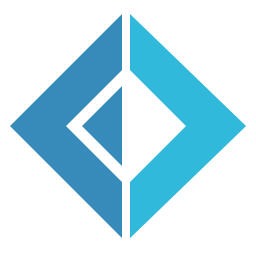

In [2]:
"https://github.com/fsharp/fsfoundation/raw/gh-pages/img/logo/fsharp256.png"
  |> Util.Url

> **Note**: Evaluation uses a REPL
>
> Notice that we used a value from an earlier snippet in a later one. Your entire notebook is a single program running in an `fsi` REPL, so you accumulate data and functions as you go. The caveat is that code cells aren't reevaluated unless you specifically run them. If you go back and edit an earlier snippet, then, you can reference objects that are defined in later code cells! If you reevaluate your entire notebook, this causes errors.
>
> Just remember that your notebook is a single REPL instance, and you won't be surprised by this behavior.

## Custom `Display` Printers

The `Display` function can show many things in your F# Azure Notebook already, but you can extend it to display any type in any way that suits you. To do this, use `IfSharp.Kernel.App.AddDisplayPrinter` to add a function that accepts your type and returns a record that includes a `ContentType: string` (which is interpreted as a MIME Content-Type) and a `Data: string`, which is the content that will be interpreted by your browser as the specified Content-Type.

Often this will be "text/html" and some HTML. Here's an example:

In [3]:
open IfSharp.Kernel.App

type Person = 
    { Name: string }

AddDisplayPrinter (fun (person: Person) -> { ContentType = "text/html"; Data = "<b><i>Ahoy " + person.Name + "!</i></b>" })

After this the Person type will display in the requiested way:

In [4]:
let samplePerson = { Name = "Walter" }

samplePerson

Ahoy Walter!

# Using JavaScript to display dynamic output

You can also use existing browser display technologies directly in your Azure Notebook. Start by loading D3:

In [5]:
@"<script src=""https://d3js.org/d3.v3.min.js""></script>" |> Util.Html |> Display

Now define a few F# types and functions that will let you write D3 output as structured F# data. These types are pretty simple, and don't cover everything D3 can do, but it shows how F# can interact with JavaScript directly in your notebook.

In [6]:
type D3Op = {
    Op: string
    Style: List<string * string>
    Attr: List<string * int>
    On: List<string * List<D3Op>>
}

type D3 = List<D3Op>

let d3op = {Op = ""; Style = []; Attr = []; On = []}

let mapConcat s f xs = 
    xs |> List.map f |> String.concat s

let rec D3OpPrinter (op: D3Op) =
    sprintf 
        "%s%s%s%s"
        (if op.Op.Length > 0 then
            sprintf "\t.append(\"%s\")\n" op.Op
        else
            "")
        (op.Style |> mapConcat "\t" (fun (k, v) -> sprintf ".style(\"%s\", \"%s\")\n" k v ) )
        (op.Attr |> mapConcat "\t" (fun (k, v) -> sprintf ".attr(\"%s\", %d)\n" k v))
        (op.On
            |> mapConcat "\t" (fun (k, v) ->
                sprintf 
                    ".on(\"%s\",\n\tfunction(){\n\td3.select(this)\n%s\t})\n"
                    k
                    (v |> mapConcat "" D3OpPrinter)
                ))

let D3Printer (d3: D3) =
    sprintf 
        """
<div id="viz"></div>
<script type="text/javascript">

d3.select("#viz")
%s
"""
        (d3 |> mapConcat "" D3OpPrinter)

App.AddDisplayPrinter (fun (d3: D3) ->
  { ContentType = "text/html"
    Data = D3Printer d3 }
  )

Now use D3 to render a circle that changes color when you put your mouse over it, by writing structured data:

In [7]:
[
    {d3op with 
        Op = "svg"
        Attr = [("width", 100); ("height", 100)] }
    {d3op with
        Op = "circle"
        Style = [("stroke", "grey"); ("fill", "white")]
        Attr = [("r", 40); ("cx", 50); ("cy", 50)]
        On = 
          [ ("mouseover", [{d3op with Style = [("fill", "blue")]}])
            ("mouseout", [{d3op with Style = [("fill", "white")]}]) ] }
]

## Additional resources

The [F# Language Reference](https://docs.microsoft.com/dotnet/articles/fsharp/) is a reference for the F# language, and the [F# Guide](https://docs.microsoft.com/dotnet/articles/fsharp/) covers general topics.

[F# on Azure](https://docs.microsoft.com/dotnet/articles/fsharp/using-fsharp-on-azure/) is a technical guide for using F# in conjunction with a range of Azure services.